In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
p_cr = 29 #критическая стоимость продукта
tau1 = 21 #длительность производственного цикла фирмы 1
p1 = 7 #себестоимость продукта у фирмы 1
tau2 = 14 #длительность производственного цикла фирмы 2
p2 = 11.5 #себестоимость продукта у фирмы 2
V = 35 #число потребителей производимого продукта
q = 1 #максимальная потребность одного человека в продукте в единицу времени

In [3]:
a1 = p_cr/(tau1*tau1*p1*p1*V*q)
a2 = p_cr/(tau2*tau2*p2*p2*V*q)
b = p_cr/(tau1*tau1*tau2*tau2*p1*p1*p2*p2*V*q)
c1 = (p_cr-p1)/(tau1*p1)
c2 = (p_cr-p2)/(tau2*p2)

In [4]:
def syst(x, t): #случай 1
    return np.array([x[0] - (a1/c1)*x[0]*x[0] - (b/c1)*x[0]*x[1], (c2/c1)*x[1] - (a2/c1)*x[1]*x[1] - (b/c1)*x[0]*x[1]])

In [5]:
def syst1(x, t): #случай 2
    return np.array([x[0] - (a1/c1)*x[0]*x[0] - (b/c1)*x[0]*x[1], (c2/c1)*x[1] - (a2/c1)*x[1]*x[1] - ((b/c1)+0.00023)*x[0]*x[1]])

In [9]:
M1 = V*q*p1*tau1*(1-p1/p_cr)
M1

3903.103448275862

In [6]:
x0 = np.array([4.4, 3.1]) #начальное значение объема оборотных средств x1 и х2
t = np.linspace(0, 30, 500)
y = odeint(syst, x0, t)

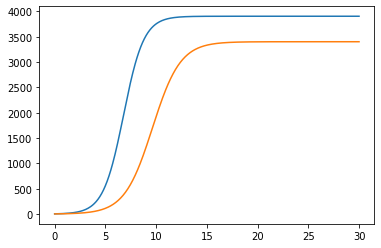

In [7]:
plt.plot(t, y)
plt.show()